ابتدا داده ها را خوانده و با مشاهده 5 سطر اول آن به درکی از محتوای داده میرسیم

In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [303]:
data = pd.read_csv('Q1_data.csv')
data.head(5)

,Unnamed: 0,symbol,name,time_stamp,time_high,time_low,open,close,high,low,market_cap,volume
0,0,BTC,Bitcoin,2023-05-17T23:59:59.999Z,2023-05-17T20:09:00.000Z,2023-05-17T14:03:00.000Z,27035.470130,27398.802028,27465.927904,26600.144844,5.308901e+11,1.514001e+10
1,1,BTC,Bitcoin,2023-05-13T23:59:59.999Z,2023-05-13T18:50:00.000Z,2023-05-13T00:32:00.000Z,26807.769044,26784.078561,27030.482960,26710.873803,5.188737e+11,9.999172e+09
2,2,BTC,Bitcoin,2023-03-08T23:59:59.999Z,2023-03-08T00:23:00.000Z,2023-03-08T23:43:00.000Z,22216.442321,21718.079830,22268.896252,21708.050506,4.194214e+11,2.253658e+10
3,3,BTC,Bitcoin,2023-02-21T23:59:59.999Z,2023-02-21T08:30:00.000Z,2023-02-21T22:06:00.000Z,24833.048914,24436.354485,25126.851686,24200.364116,4.715777e+11,3.125210e+10
4,4,BTC,Bitcoin,2022-10-15T23:59:59.999Z,2022-10-15T03:59:00.000Z,2022-10-15T23:04:00.000Z,19185.437304,19067.635082,19212.541608,19019.250125,3.657224e+11,1.619224e+10


In [304]:
from sklearn.preprocessing import StandardScaler
X=data.copy()
X['market_cap']=StandardScaler().fit_transform(np.array(X['market_cap']).reshape(-1, 1))
X['volume']=StandardScaler().fit_transform(np.array(X['volume']).reshape(-1, 1))
features = data[['market_cap','volume']]


In [305]:
X

,Unnamed: 0,symbol,name,time_stamp,time_high,time_low,open,close,high,low,market_cap,volume
0,0,BTC,Bitcoin,2023-05-17T23:59:59.999Z,2023-05-17T20:09:00.000Z,2023-05-17T14:03:00.000Z,27035.470130,27398.802028,27465.927904,26600.144844,1.975139,-0.074785
1,1,BTC,Bitcoin,2023-05-13T23:59:59.999Z,2023-05-13T18:50:00.000Z,2023-05-13T00:32:00.000Z,26807.769044,26784.078561,27030.482960,26710.873803,1.904775,-0.377413
2,2,BTC,Bitcoin,2023-03-08T23:59:59.999Z,2023-03-08T00:23:00.000Z,2023-03-08T23:43:00.000Z,22216.442321,21718.079830,22268.896252,21708.050506,1.322411,0.360633
3,3,BTC,Bitcoin,2023-02-21T23:59:59.999Z,2023-02-21T08:30:00.000Z,2023-02-21T22:06:00.000Z,24833.048914,24436.354485,25126.851686,24200.364116,1.627823,0.873694
4,4,BTC,Bitcoin,2022-10-15T23:59:59.999Z,2022-10-15T03:59:00.000Z,2022-10-15T23:04:00.000Z,19185.437304,19067.635082,19212.541608,19019.250125,1.007965,-0.012843
...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1451,BTC,Bitcoin,2022-11-07T23:59:59.999Z,2022-11-07T02:18:00.000Z,2022-11-07T22:33:00.000Z,20924.620484,20602.816725,21053.246150,20489.973344,1.182899,2.184011
1452,1452,BNB,BNB,2022-12-24T23:59:59.999Z,2022-12-24T00:02:00.000Z,2022-12-24T12:32:00.000Z,246.151646,244.635529,246.181715,243.953043,-0.904444,-0.949519
1453,1453,ETH,Ethereum,2023-04-18T23:59:59.999Z,2023-04-18T11:51:00.000Z,2023-04-18T01:16:00.000Z,2075.855262,2104.537267,2121.531519,2057.653862,0.337443,-0.428343
1454,1454,ETH,Ethereum,2022-10-18T23:59:59.999Z,2022-10-18T00:35:00.000Z,2022-10-18T19:17:00.000Z,1331.669921,1310.447037,1339.085967,1291.660699,-0.194550,-0.352831


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در فایل مجموعه داده ی بخش نخست، اطلاعات تاریخچه ی ۴ کوین برتر بازار در بازه ی زمانی یکساله
 است. اسکتر پلات این داده ها را با محورهای <code>market cap</code> و <code>volume</code> رسم نمایید
.
</font>
</p>

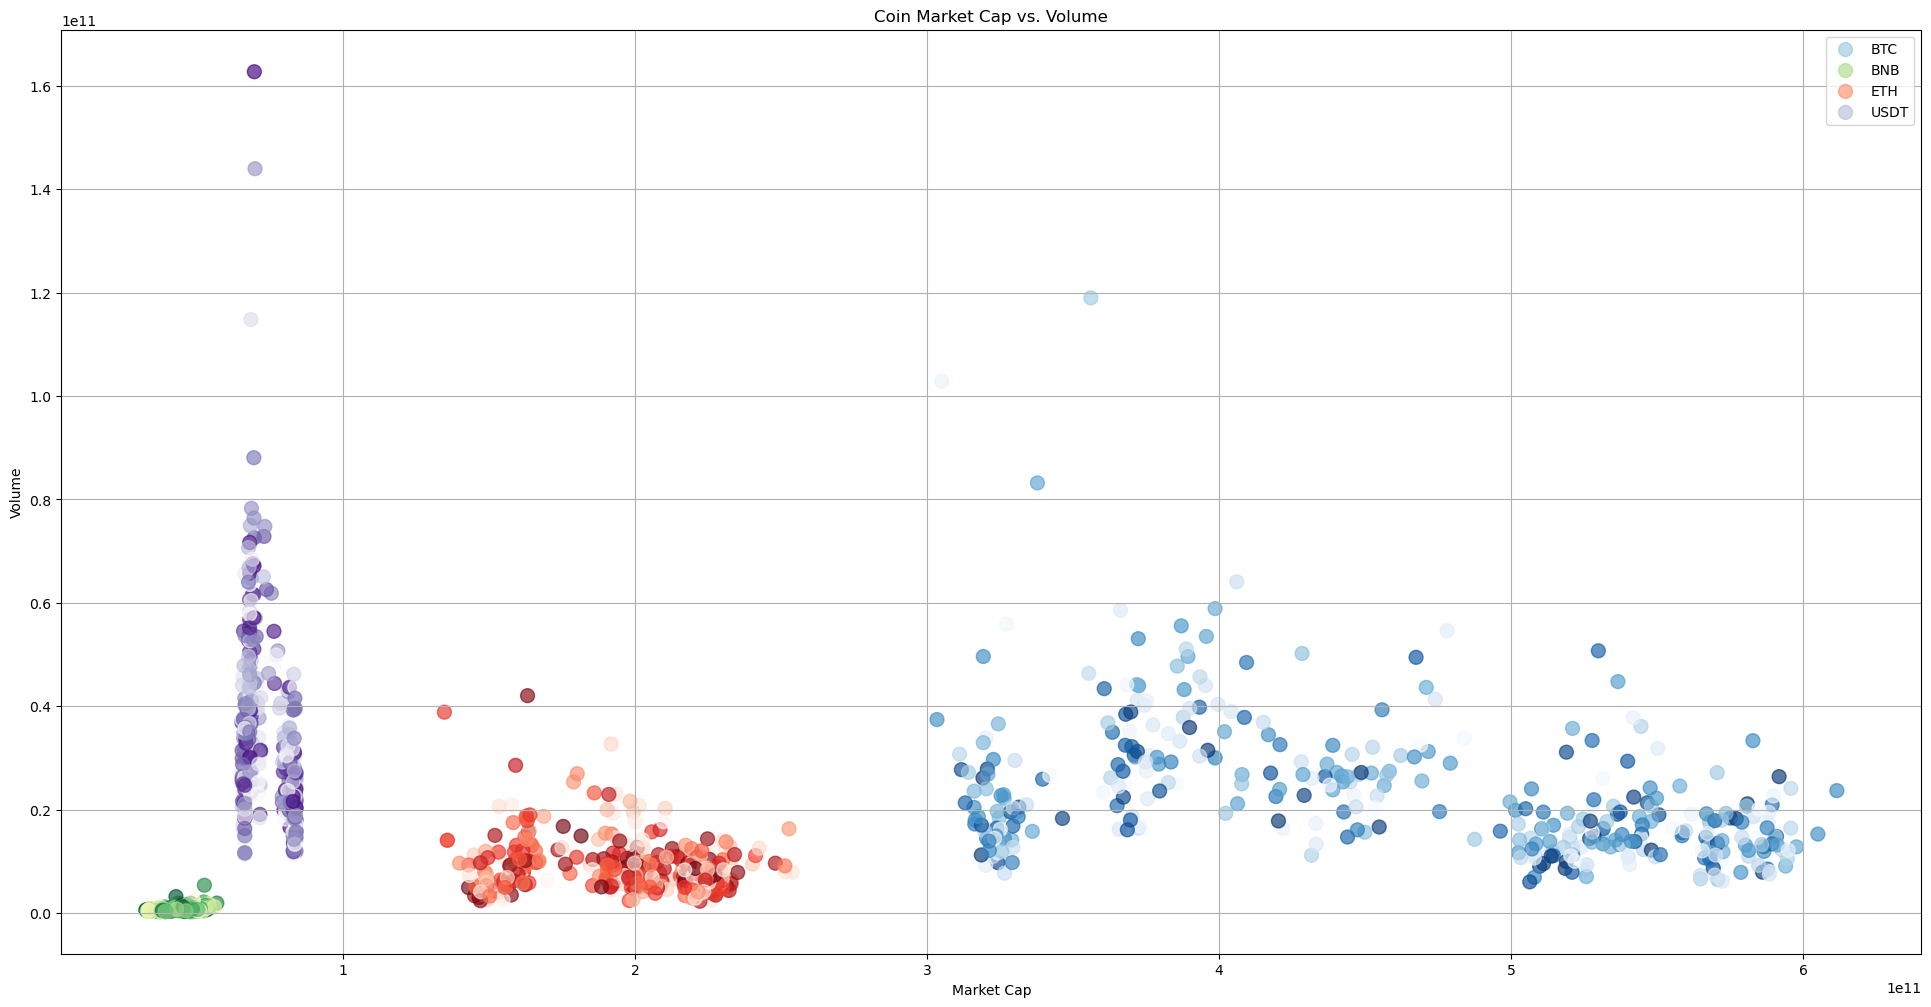

In [306]:
# Define colors for each coin
colors = {'BTC': 'blue', 'BNB': 'green', 'ETH': 'red', 'USDT': 'purple'}
alphas= {'BTC': 'Blues', 'BNB':'YlGn', 'ETH':'Reds', 'USDT':'Purples'}
np.random.seed(42)
alpaa_rand=np.random.rand(364)
# Create a scatter plot
plt.figure(figsize=(24, 12))
for coin in colors:
    subset = data[data['symbol'] == coin]
    plt.scatter(subset['market_cap'], subset['volume'],s=100, label=coin, c=alpaa_rand,cmap=alphas[coin],alpha=0.65)

# Customize the plot
plt.title('Coin Market Cap vs. Volume')
plt.xlabel('Market Cap')
plt.ylabel('Volume')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بخش ۱
</font>



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال الگوریتم خوشه بندی <code>K-means</code> را تنها بر حسب دو ویژگی <code>market cap </code> و <code>volume</code> با ۵ خوشه برای
این مجموعه داده اجرا کنید. سپس بر روی اسکتر پلات رسم شده مشخص کنید کدام نقاط مربوط به کدام
خوشه هستند و مرکز هر خوشه را نیز رسم کنید. به انتخاب رنگ، مارکر، نامگذاری محورها و به طور کلی قابل
درک بودن تصویر دقت داشته باشید.
</font>
</p>

In [307]:
from sklearn.cluster import KMeans

# select the main features
features = data[['market_cap','volume']]

# perform k-means clustering
model_kmeans = KMeans(n_clusters=5, random_state=42)
features['cluster'] = model_kmeans.fit_predict(features)
#the cluster ids will be 0, 1, 2, 3, 4 for 5 clusters

cluster_centroids = model_kmeans.cluster_centers_
print('the cluster centroids will be in \n', cluster_centroids)

the cluster centroids will be in 
 [[4.45996615e+10 6.80796582e+08]
 [5.44479225e+11 1.71794734e+10]
 [1.96251675e+11 8.76098756e+09]
 [7.47526885e+10 3.31651327e+10]
 [3.74621528e+11 2.86925418e+10]]


حال نمودار داده ها را به ازای هر خوشه با یک رنگ مجزا به همراه مرکز خوشه نمایش میدهیم

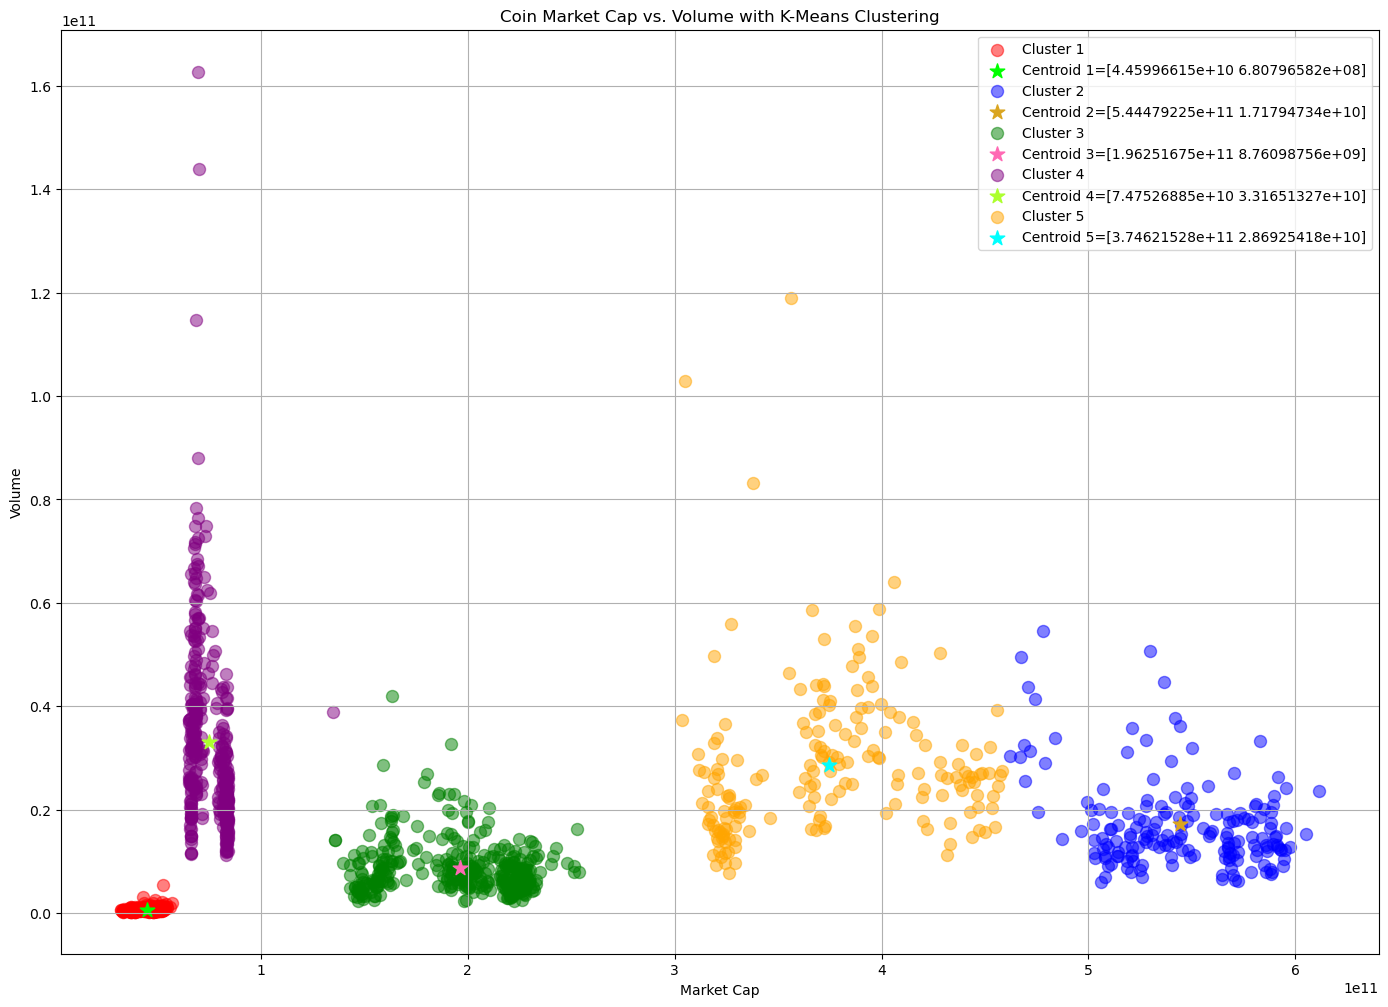

In [308]:
# Define cluster colors
cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange'}
colorw=['lime','goldenrod','hotpink','greenyellow','cyan']
# Create a scatter plot with cluster centroids
plt.figure(figsize=(17,12))
for cluster_id, color in cluster_colors.items():
    cluster_data = features[features['cluster'] == cluster_id]
    plt.scatter(cluster_data['market_cap'], cluster_data['volume'], label=f'Cluster {cluster_id+1}', c=color,s=75,alpha=0.5)
    plt.scatter(cluster_centroids[cluster_id, 0], cluster_centroids[cluster_id, 1], marker='*',s=120, c=colorw[cluster_id], label=f'Centroid {cluster_id+1}={cluster_centroids[cluster_id]}',alpha=1)

# Customize the plot
plt.title('Coin Market Cap vs. Volume with K-Means Clustering')
plt.xlabel('Market Cap')
plt.ylabel('Volume')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بخش 2
</font>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
پس از آن الگوریتم <code>K-means</code> را برای k هایی از ۱ تا ۱۰ اجرا کرده 
</font>
</p>

In [309]:
from sklearn.metrics import silhouette_score,silhouette_samples

the cluster centroids will be in 
 [[1.93588493e+11 1.64103995e+10 1.87774725e+00]]


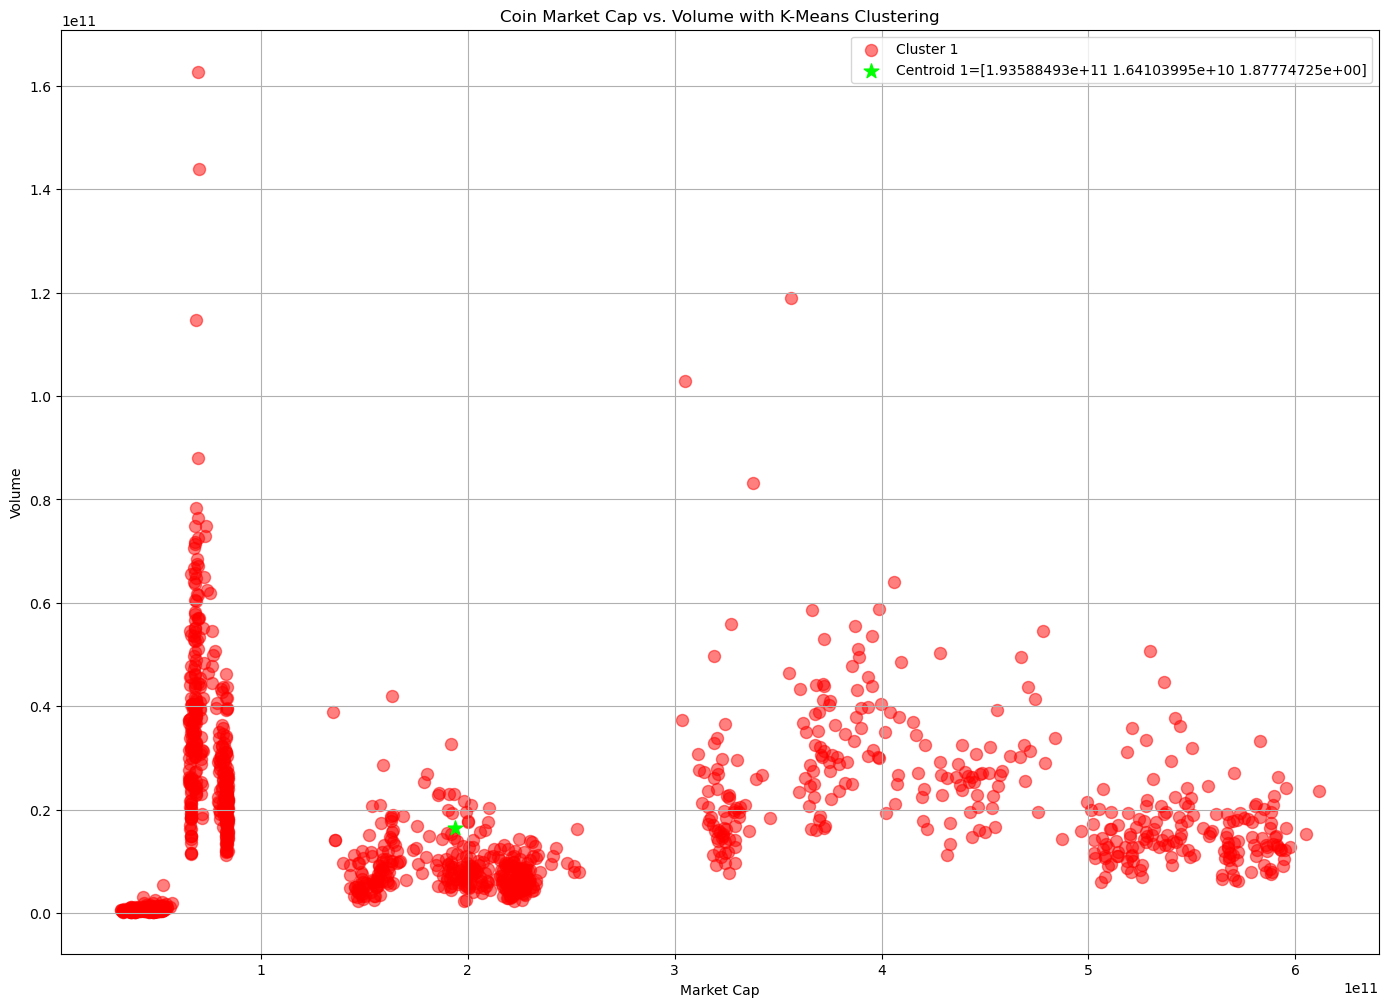

the cluster centroids  for k = 2 will be in 
 [[1.05090079e+11 1.42246537e+10 0.00000000e+00]
 [4.59083735e+11 2.29676369e+10 0.00000000e+00]]
Silhouette score for k(clusters) = 2 is 0.7298408583594653


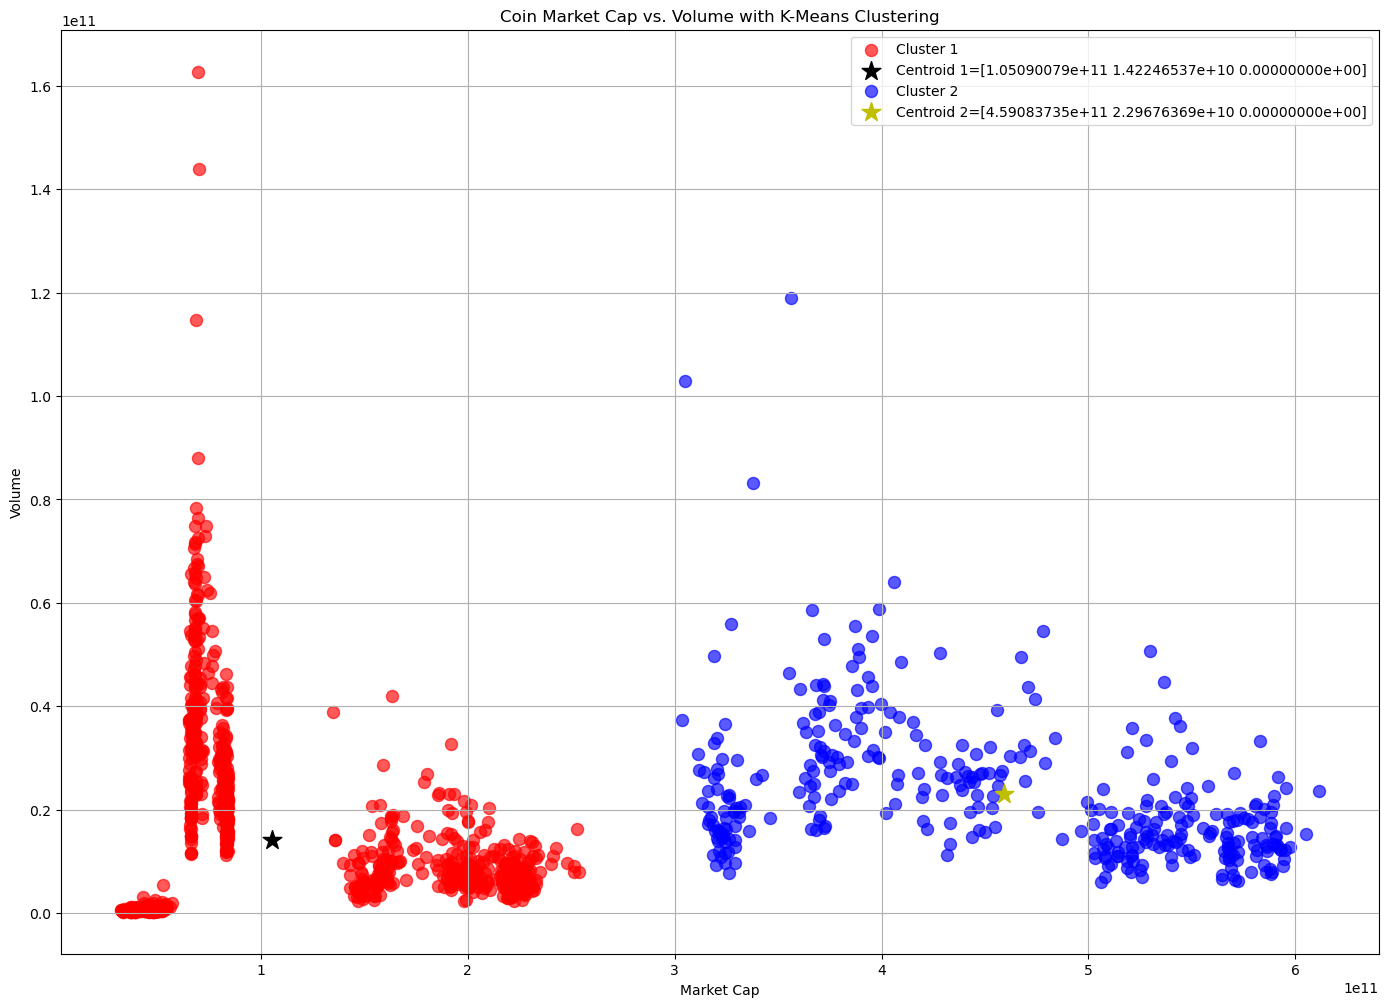

the cluster centroids  for k = 3 will be in 
 [[5.99046169e+10 1.69374058e+10 0.00000000e+00]
 [4.87966331e+11 2.29669123e+10 1.00000000e+00]
 [2.15728639e+11 1.08758222e+10 1.50588235e-01]]
Silhouette score for k(clusters) = 3 is 0.6979443227657793


<Figure size 640x480 with 0 Axes>

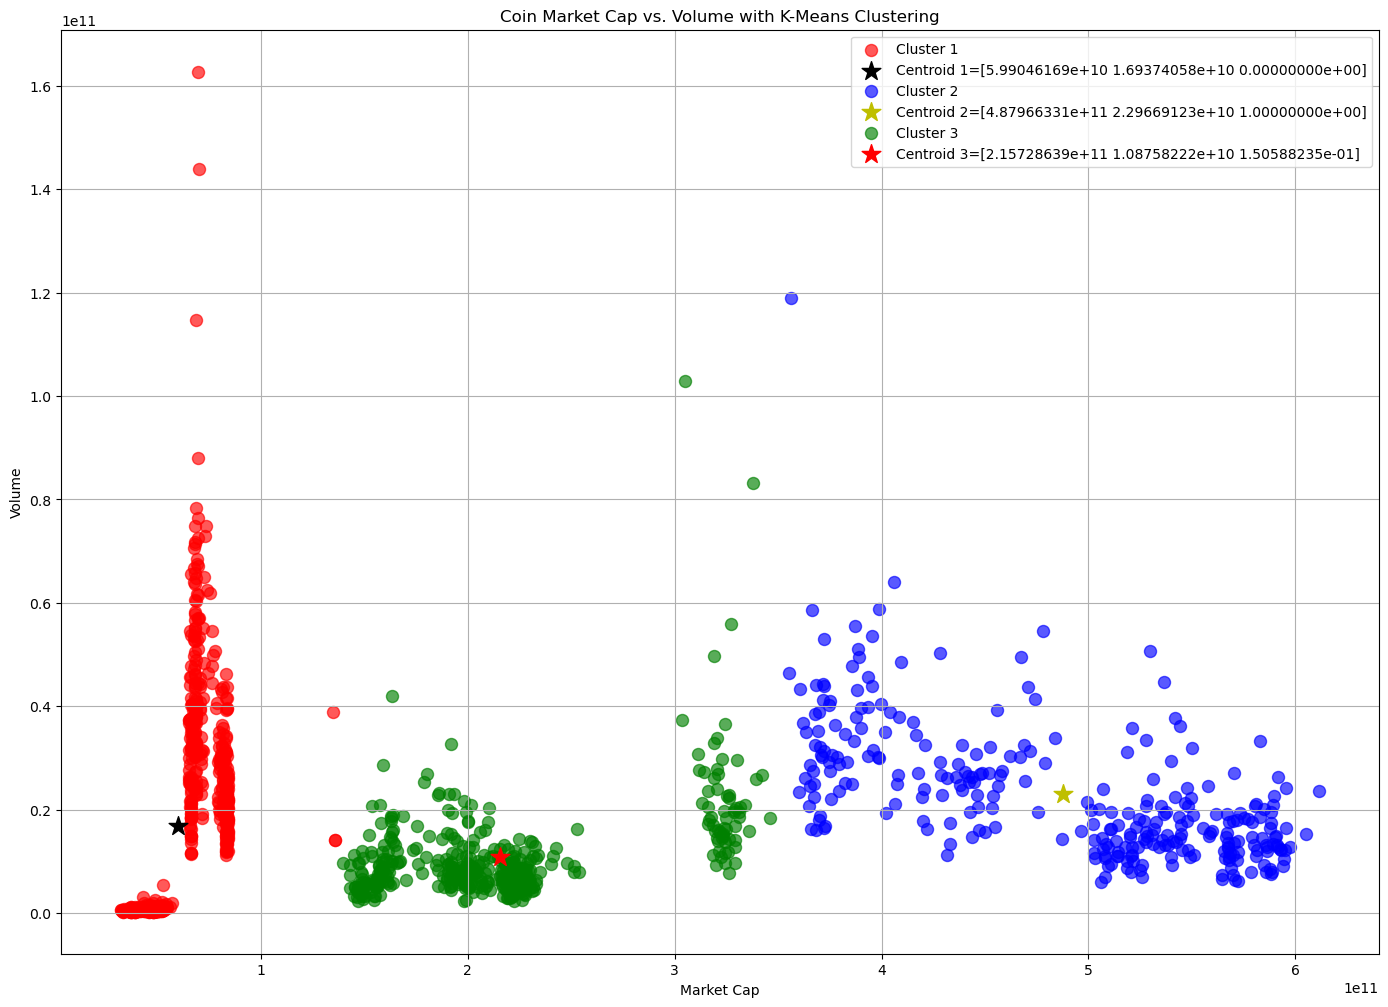

the cluster centroids  for k = 4 will be in 
 [[5.95939232e+10 1.69151359e+10 1.44328993e-15]
 [5.44479225e+11 1.71794734e+10 1.00000000e+00]
 [1.96082390e+11 8.84368950e+09 1.98351648e+00]
 [3.74621528e+11 2.86925418e+10 1.34972678e+00]]
Silhouette score for k(clusters) = 4 is 0.7302323776888859


<Figure size 640x480 with 0 Axes>

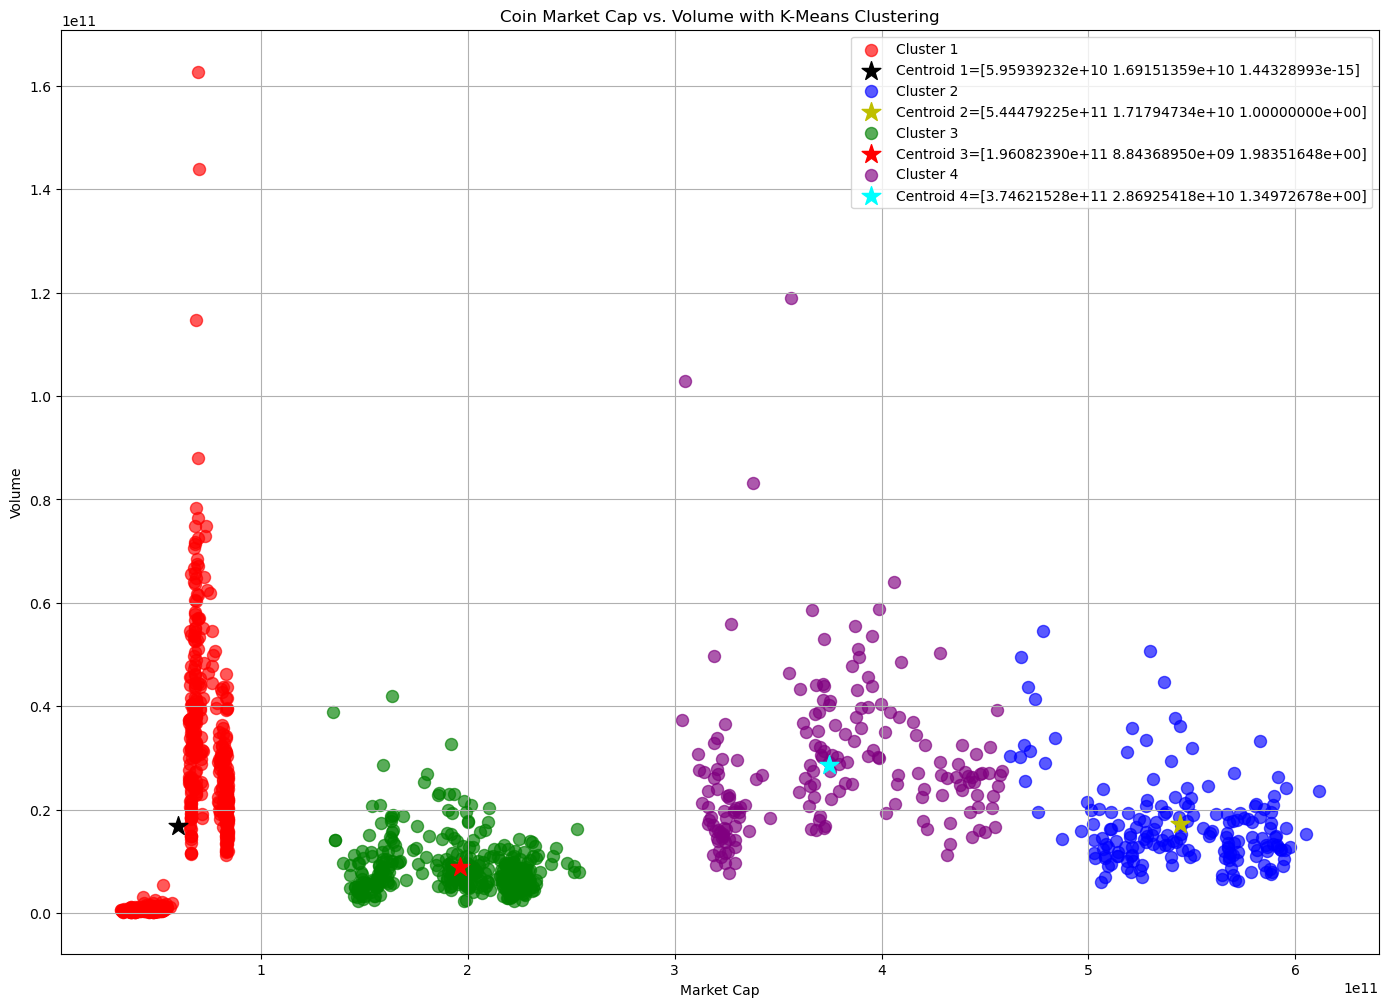

the cluster centroids  for k = 5 will be in 
 [[4.45996615e+10 6.80796582e+08 8.88178420e-16]
 [5.44479225e+11 1.71794734e+10 1.00000000e+00]
 [1.96251675e+11 8.76098756e+09 2.00000000e+00]
 [7.47526885e+10 3.31651327e+10 5.47945205e-03]
 [3.74621528e+11 2.86925418e+10 3.00000000e+00]]
Silhouette score for k(clusters) = 5 is 0.6832182402752736


<Figure size 640x480 with 0 Axes>

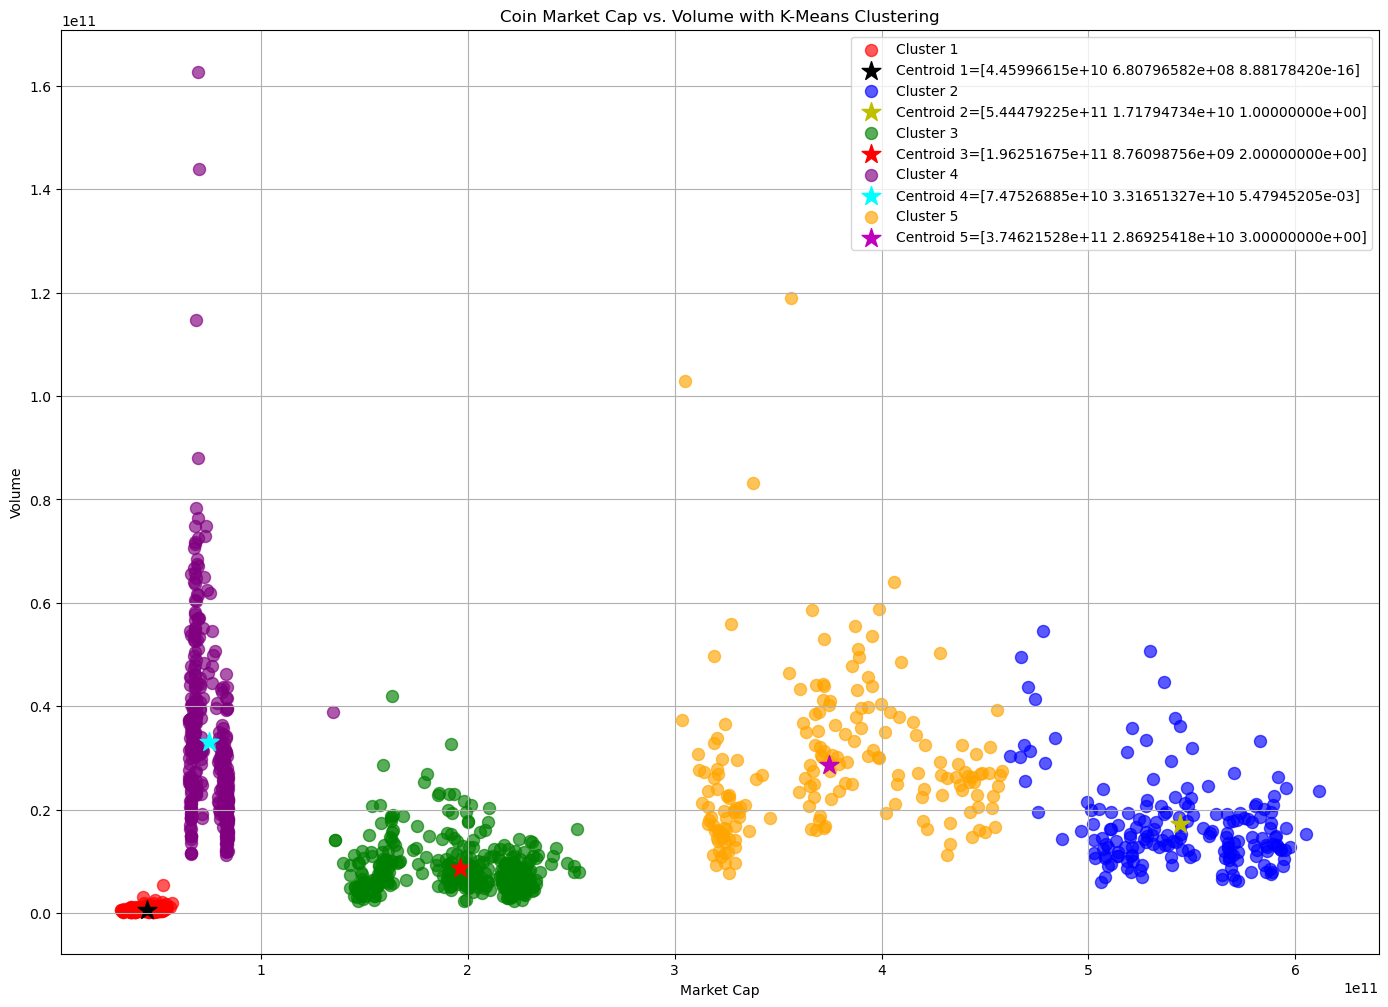

the cluster centroids  for k = 6 will be in 
 [[4.35307111e+11 2.97827642e+10 3.48684211e+00]
 [7.47526885e+10 3.31651327e+10 3.00000000e+00]
 [1.96251675e+11 8.76098756e+09 2.00000000e+00]
 [3.46898128e+11 2.85254930e+10 4.00000000e+00]
 [4.45996615e+10 6.80796582e+08 1.77635684e-15]
 [5.49972402e+11 1.59147058e+10 1.00000000e+00]]
Silhouette score for k(clusters) = 6 is 0.6678283862282389


<Figure size 640x480 with 0 Axes>

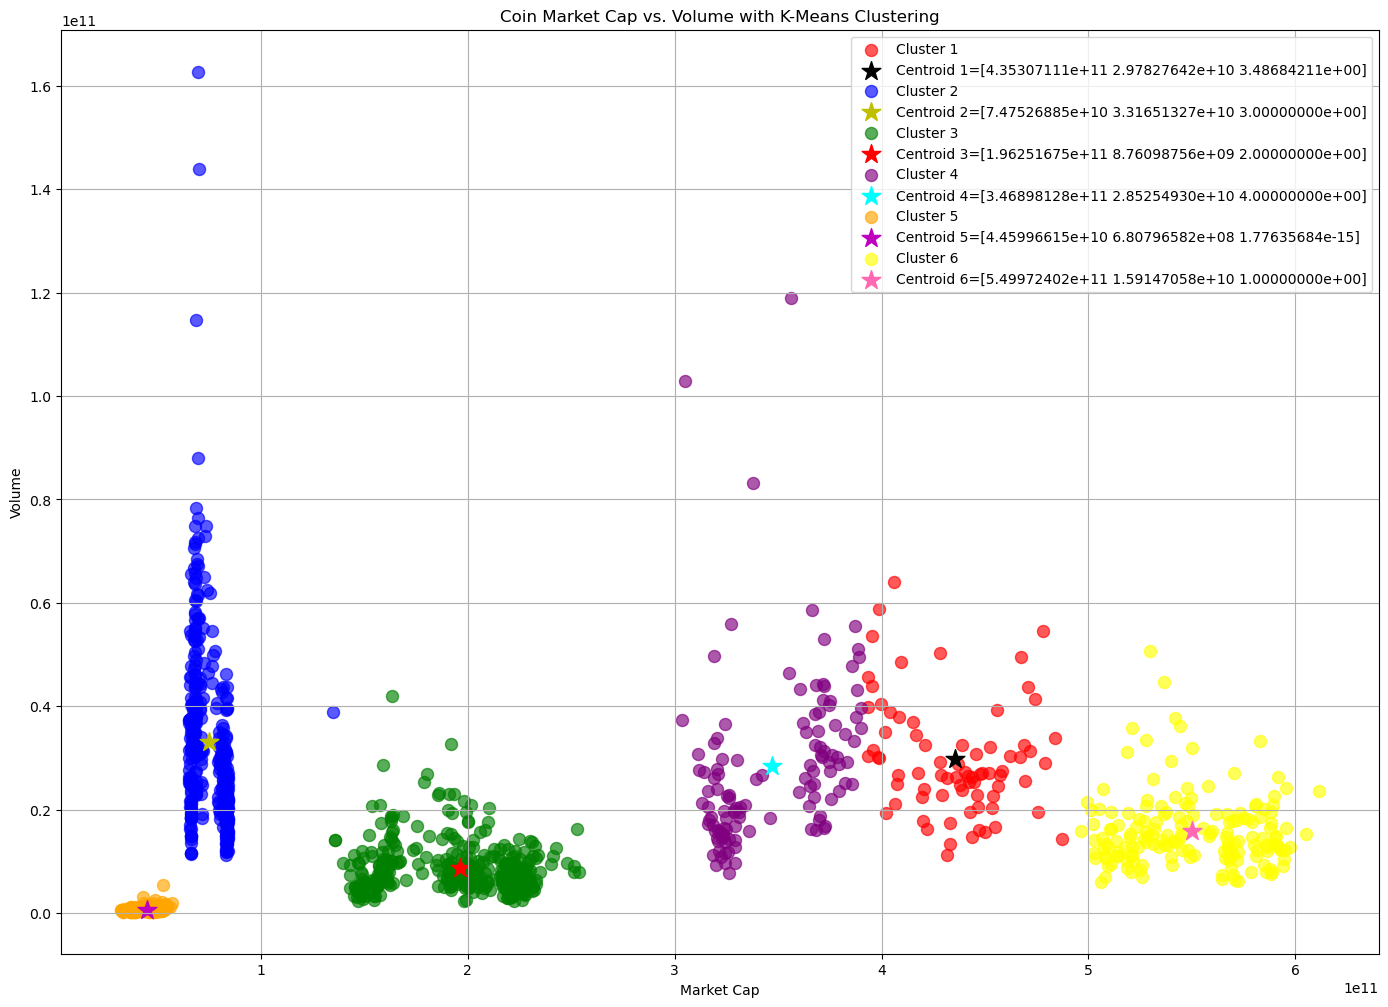

the cluster centroids  for k = 7 will be in 
 [[4.45996615e+10 6.80796582e+08 4.00000000e+00]
 [4.35307111e+11 2.97827642e+10 1.33226763e-15]
 [2.14074648e+11 8.25432592e+09 2.00000000e+00]
 [3.46898128e+11 2.85254930e+10 3.00000000e+00]
 [1.58098735e+11 1.00879015e+10 1.99145299e+00]
 [5.49972402e+11 1.59147058e+10 5.00000000e+00]
 [7.45881848e+10 3.31494752e+10 1.00000000e+00]]
Silhouette score for k(clusters) = 7 is 0.6666947664387164


<Figure size 640x480 with 0 Axes>

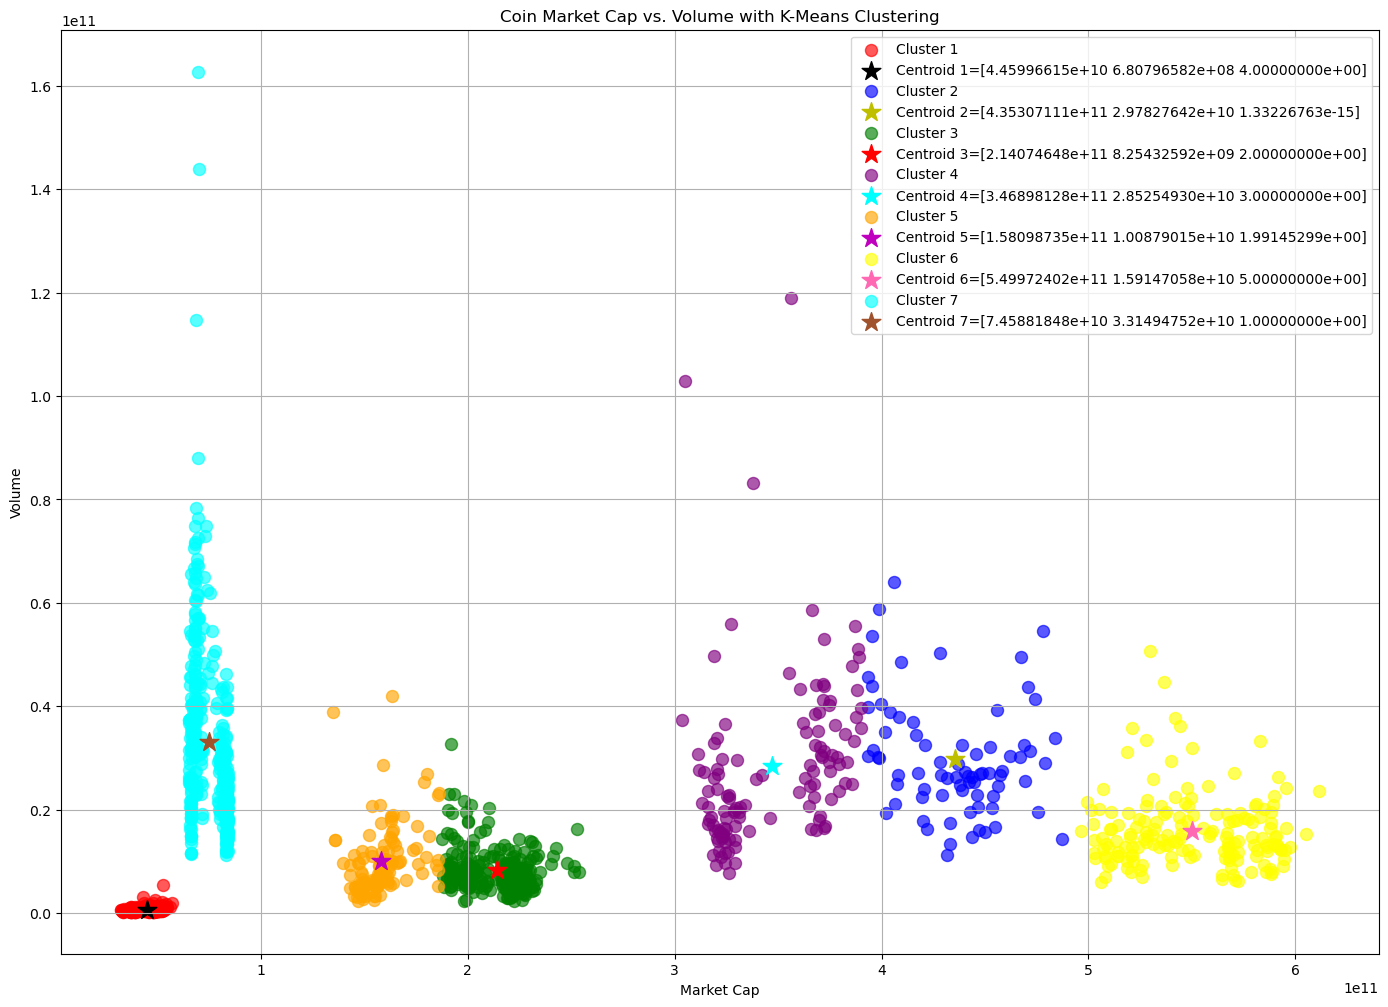

the cluster centroids  for k = 8 will be in 
 [[4.45996615e+10 6.80796582e+08 6.66133815e-15]
 [5.23903381e+11 1.73057222e+10 4.83157895e+00]
 [2.14074648e+11 8.25432592e+09 2.00000000e+00]
 [4.27258841e+11 3.15307723e+10 1.24390244e+00]
 [7.45881848e+10 3.31494752e+10 6.00000000e+00]
 [1.58098735e+11 1.00879015e+10 4.00000000e+00]
 [3.43180156e+11 2.73116485e+10 3.00000000e+00]
 [5.78579429e+11 1.46282019e+10 5.00000000e+00]]
Silhouette score for k(clusters) = 8 is 0.6566569240389969


<Figure size 640x480 with 0 Axes>

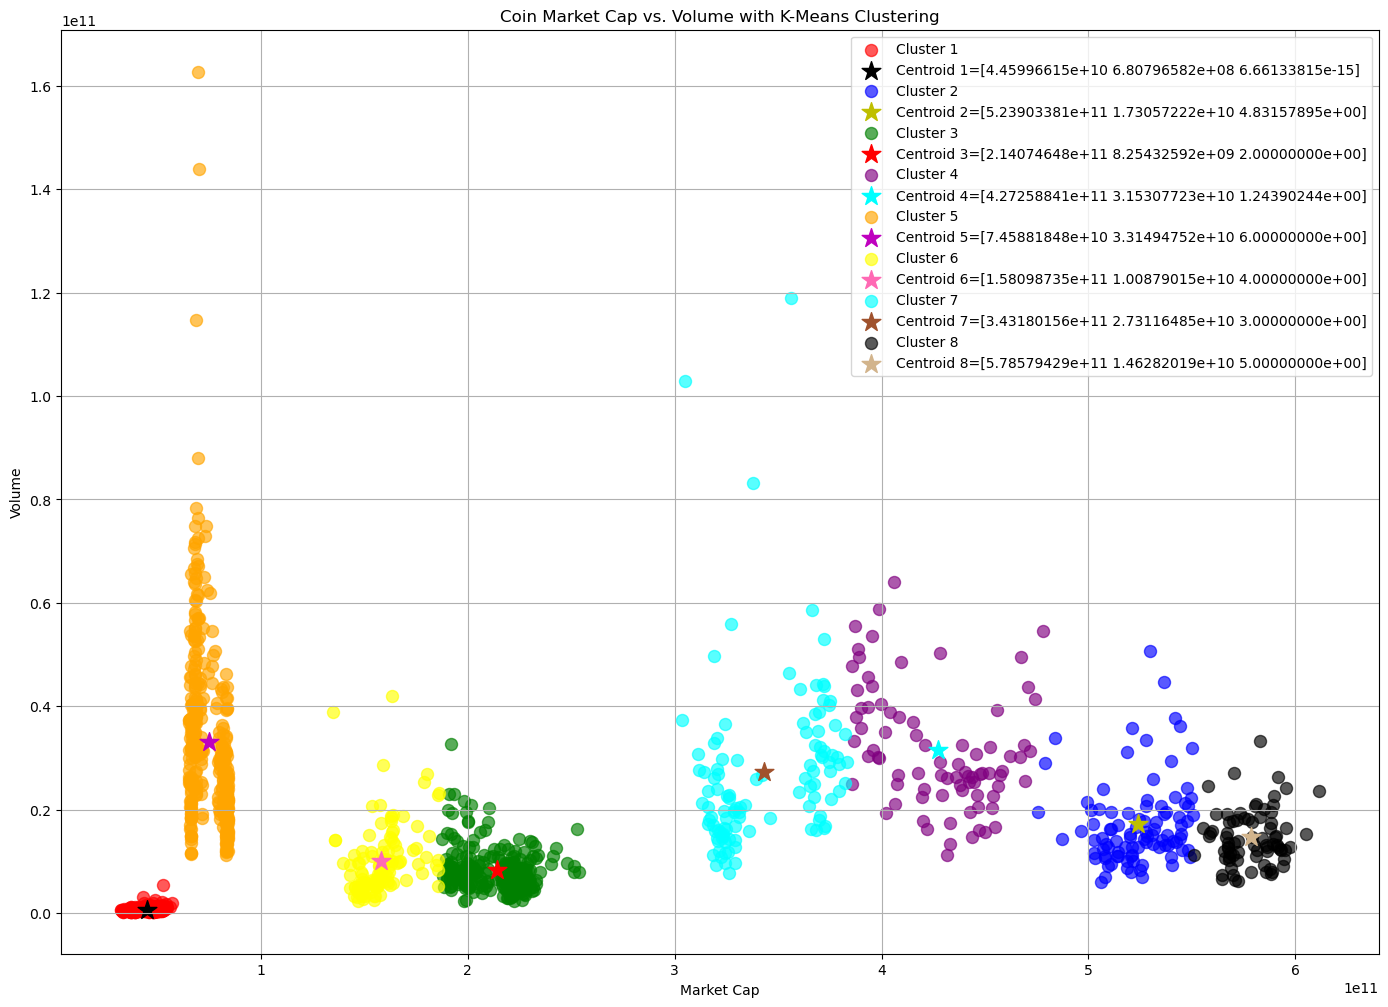

the cluster centroids  for k = 9 will be in 
 [[4.45996615e+10 6.80796582e+08 5.32907052e-15]
 [5.25626960e+11 1.69125387e+10 1.06451613e+00]
 [2.14074648e+11 8.25432592e+09 2.00000000e+00]
 [3.80361797e+11 3.56518880e+10 4.84000000e+00]
 [7.45881848e+10 3.31494752e+10 4.00000000e+00]
 [1.58098735e+11 1.00879015e+10 5.00000000e+00]
 [4.46070079e+11 2.72901035e+10 2.89285714e+00]
 [5.78941220e+11 1.46719762e+10 7.00000000e+00]
 [3.23696565e+11 2.29710334e+10 6.00000000e+00]]
Silhouette score for k(clusters) = 9 is 0.6685862070145338


<Figure size 640x480 with 0 Axes>

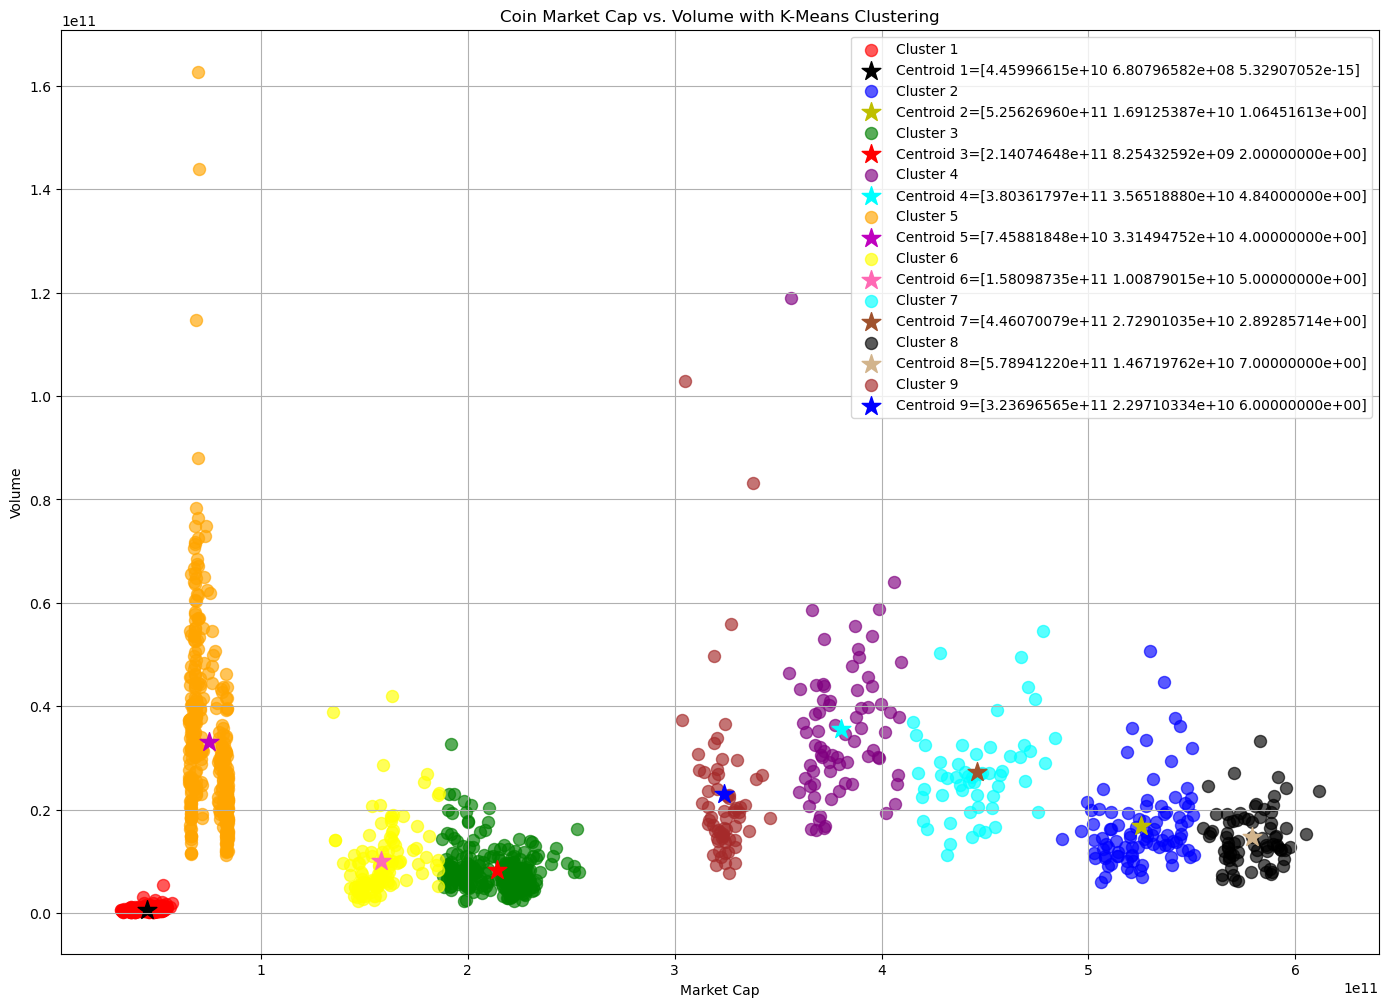

the cluster centroids  for k = 10 will be in 
 [[ 2.14074648e+11  8.25432592e+09  2.00000000e+00]
 [ 4.46070079e+11  2.72901035e+10  6.00000000e+00]
 [ 4.45996615e+10  6.80796582e+08 -8.88178420e-16]
 [ 5.78941220e+11  1.46719762e+10  7.00000000e+00]
 [ 3.23696565e+11  2.29710334e+10  8.00000000e+00]
 [ 7.58399914e+10  2.63196619e+10  4.00000000e+00]
 [ 1.58098735e+11  1.00879015e+10  5.00000000e+00]
 [ 5.25626960e+11  1.69125387e+10  1.00000000e+00]
 [ 3.80361797e+11  3.56518880e+10  3.00000000e+00]
 [ 6.95981066e+10  6.03751689e+10  4.00000000e+00]]
Silhouette score for k(clusters) = 10 is 0.6626116214129445


<Figure size 640x480 with 0 Axes>

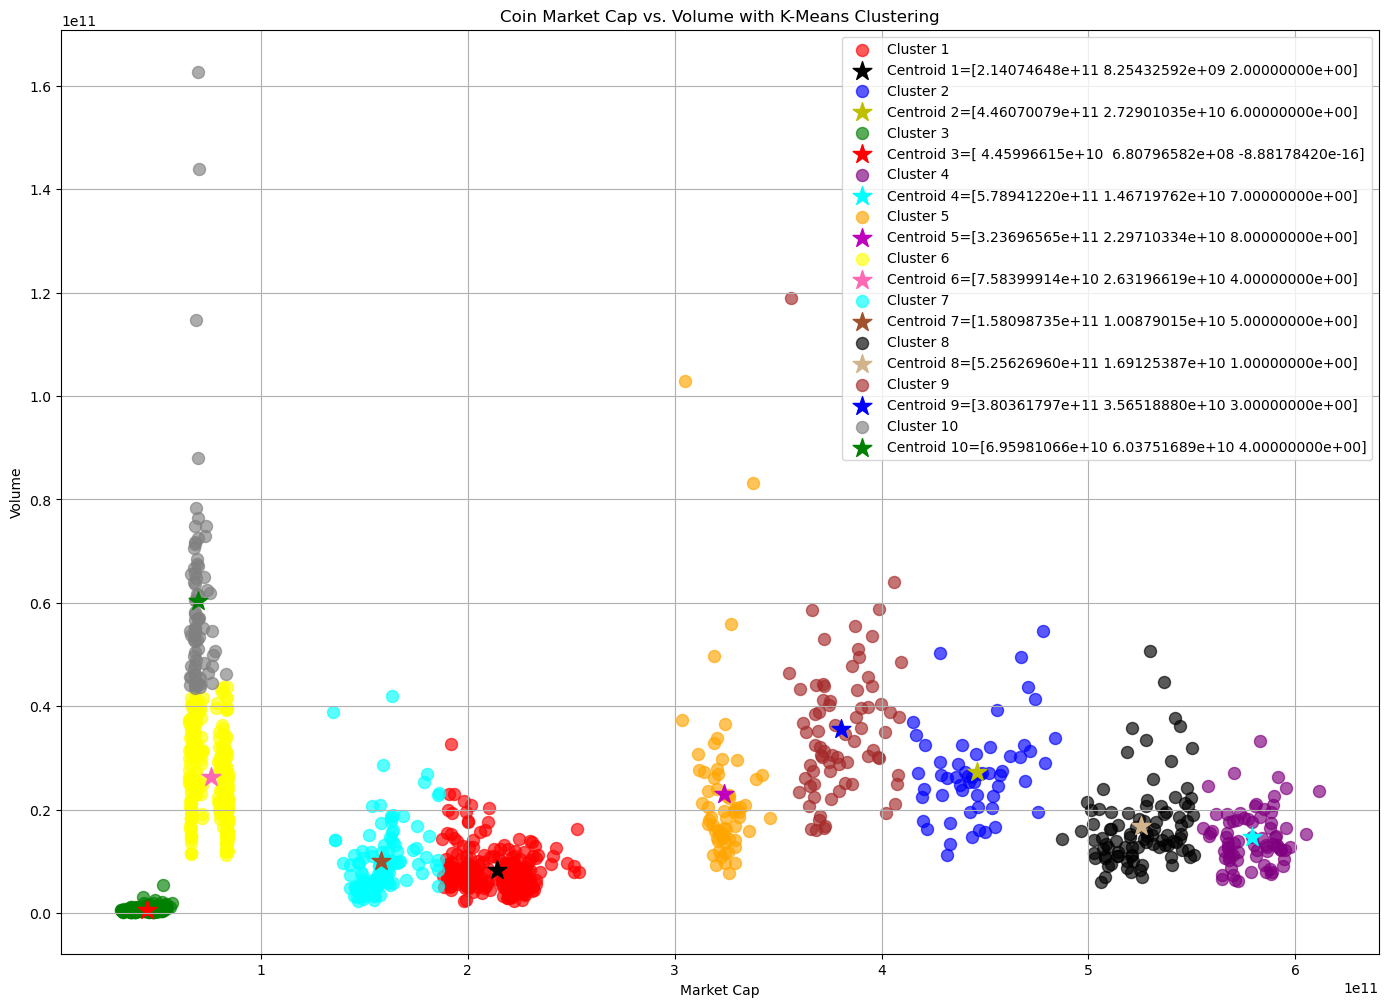

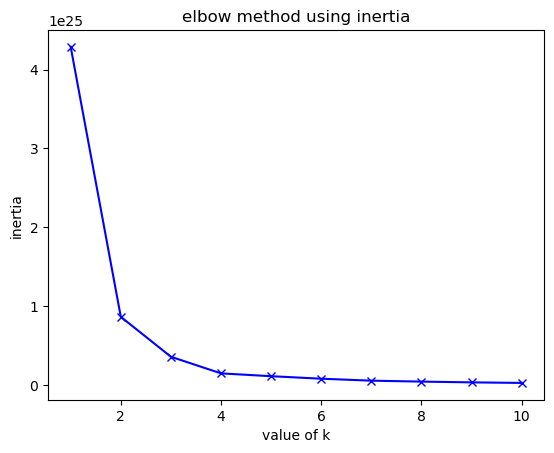

   Clusters  Sil Score
0         2   0.729841
1         3   0.697944
2         4   0.730232
3         5   0.683218
4         6   0.667828
5         7   0.666695
6         8   0.656657
7         9   0.668586
8        10   0.662612


<Axes: xlabel='Clusters', ylabel='Sil Score'>

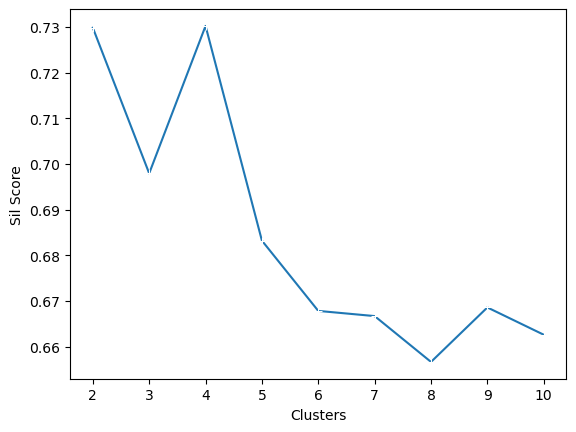

In [310]:
# Define cluster colors

inertias = []
sil_score=[]

######################################################################################3


# perform k-means clustering
model_kmeans = KMeans(n_clusters=1, random_state=42)
features['cluster'] = model_kmeans.fit_predict(features)
#the cluster ids will be 0, 1, 2, 3, 4 for 5 clusters

cluster_centroids = model_kmeans.cluster_centers_
print('the cluster centroids will be in \n', cluster_centroids)
cluster_colors = {0: 'red'}
colorw=['lime']
# Create a scatter plot with cluster centroids
plt.figure(figsize=(17,12))
for cluster_id, color in cluster_colors.items():
    cluster_data = features[features['cluster'] == cluster_id]
    fit_k=model_kmeans.fit(features)
    inertias.append(fit_k.inertia_)
    plt.scatter(cluster_data['market_cap'], cluster_data['volume'], label=f'Cluster {cluster_id+1}', c=color,s=75,alpha=0.5)
    plt.scatter(cluster_centroids[cluster_id, 0], cluster_centroids[cluster_id, 1], marker='*',s=120, c=colorw[cluster_id], label=f'Centroid {cluster_id+1}={cluster_centroids[cluster_id]}',alpha=1)

# Customize the plot
plt.title('Coin Market Cap vs. Volume with K-Means Clustering')
plt.xlabel('Market Cap')
plt.ylabel('Volume')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange', 5:'yellow', 6:'cyan', 7:'black', 8:'brown', 9:'gray'}
colorw=['k','y','r','cyan','m','hotpink','sienna','tan','b','g']

for K in range(1,10):
    # perform k-means clustering
    model_kmeans = KMeans(n_clusters=K+1, random_state=42)
    features['cluster'] = model_kmeans.fit_predict(features)
    #the cluster ids will be 0, 1, 2, 3, ... , K for K clusters

    cluster_centroids = model_kmeans.cluster_centers_
    print(f'the cluster centroids  for k = {K+1} will be in \n', cluster_centroids)
    fit_k=model_kmeans.fit(features)
    inertias.append(fit_k.inertia_)
    sil_score.append(silhouette_score(features,fit_k.labels_,metric="euclidean",random_state=200))
    print ("Silhouette score for k(clusters) = "+str(K+1)+" is "+str(silhouette_score(features,fit_k.labels_,metric="euclidean",random_state=200)))



    # Create a scatter plot with cluster centroids
    plt.figure(figsize=(17, 12))
    for cluster_id, color in cluster_colors.items():
        if cluster_id > K:
            break
        cluster_data = features[features['cluster'] == cluster_id]
        plt.scatter(cluster_data['market_cap'], cluster_data['volume'], label=f'Cluster {cluster_id+1}', c=color,alpha=0.65,s=75)
        plt.scatter(cluster_centroids[cluster_id, 0], cluster_centroids[cluster_id, 1], marker='*', c=colorw[cluster_id], s=200, label=f'Centroid {cluster_id+1}={cluster_centroids[cluster_id]}')

    # Customize the plot
    plt.title('Coin Market Cap vs. Volume with K-Means Clustering')
    plt.xlabel('Market Cap')
    plt.ylabel('Volume')
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()
    plt.savefig(f'scatter plot for k of {K+1}.png')
plt.plot(range(1,11),inertias,'bx-')
plt.xlabel('value of k')
plt.ylabel('inertia')
plt.title('elbow method using inertia')
plt.show()
sil_centers = pd.DataFrame({'Clusters' : range(2,11), 'Sil Score' : sil_score})
print(sil_centers)
sns.lineplot(x = 'Clusters', y = 'Sil Score', data = sil_centers, marker="+")

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
خوشه بندی پس از استاندارد سازی
</font>
</p>

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بخش 3
</font>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در آخرین گام از این سوال از شما میخواهیم با استفاده از روش <code>DBScan</code> داده ها را بر حسب دو ویژگی
<code>market cap </code> و <code>volume</code> خوشه بندی کنید و هایپر پارامترها را به نحوی تغییر دهید که ۵ کلاستر بامعنا در
خروجی تولید شود. اسکتر پلات داده ها و نحوه ی خوشه بندی آنها را رسم کنید. نحوه ی اثرگذاری هر یک از
هایپر پارامترها بر خروجی را توضیح دهید.
</font>
</p>

################################################################((((((((((((((((((((((((((((1))))))))))))))))))))))))))))######################################################################

len: 1456
max 91066829355.60596
min 131300217.51793799
knee 1411 
elbow 1411


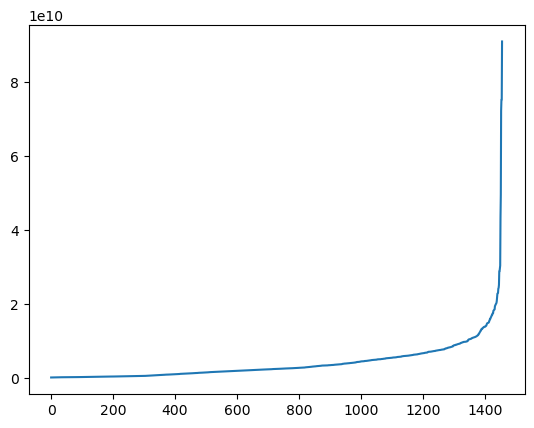

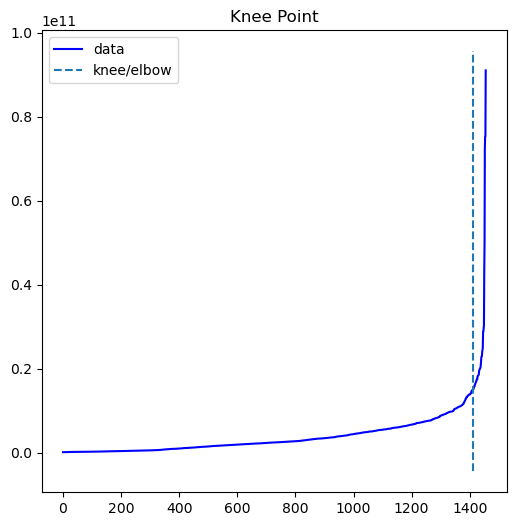

In [311]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
n_neighbor=10
neighbor,neighbor_index=NearestNeighbors(n_neighbors=n_neighbor).fit(data[['market_cap','volume']]).kneighbors()
n=neighbor[:,n_neighbor-1]
print('len:',len(n))
print('max',max(n))
print('min',min(n))
sort_neighbor=np.sort(n)
plt.plot(sort_neighbor)
k_l=KneeLocator(np.arange(len(n)),sort_neighbor,curve='convex')
print('knee',k_l.knee,'\nelbow',k_l.elbow)
k_l.plot_knee()

In [312]:
sort_neighbor[k_l.knee]

14931702306.611433

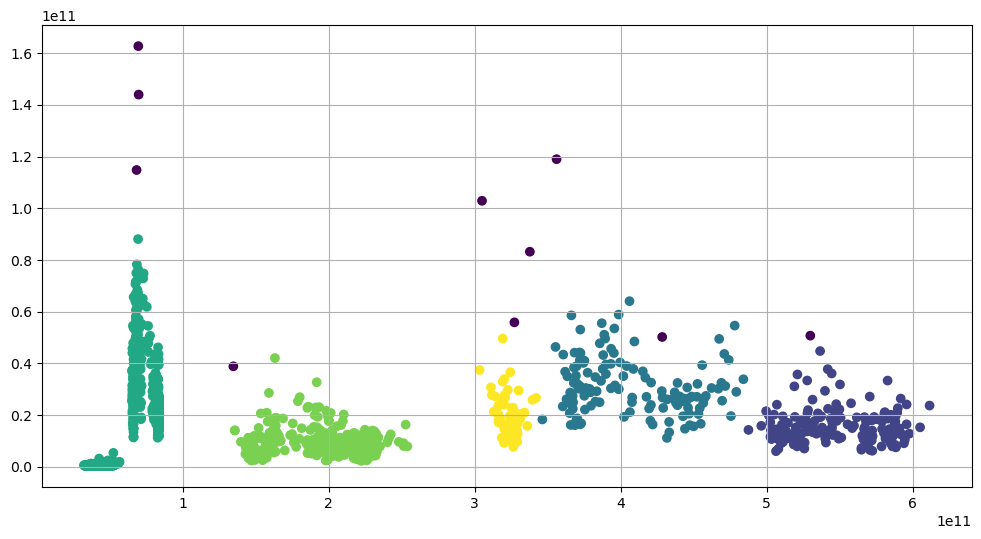

In [313]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=16921911111.611433,min_samples=n_neighbor)#eps=15108888119,min_samples=8
dbscan.fit(data[['market_cap','volume']])
f,x=plt.subplots(figsize=(12,6))
x.scatter(data['market_cap'],data['volume'],c=dbscan.labels_)
x.grid(True)

In [314]:
np.unique(dbscan.labels_,return_counts=True)

(array([-1,  0,  1,  2,  3,  4], dtype=int64),
 array([ 10, 168, 130, 725, 363,  60], dtype=int64))

In [315]:
noise=list(dbscan.labels_).count(-1)
print('noise:',noise)
noise*100/len(dbscan.labels_)

noise: 10


0.6868131868131868

################################################################((((((((((((((((((((((((((((2))))))))))))))))))))))))))))######################################################################

len: 1456
max 84446401759.00789
min 58489143.54261836
knee 1421 
elbow 1421


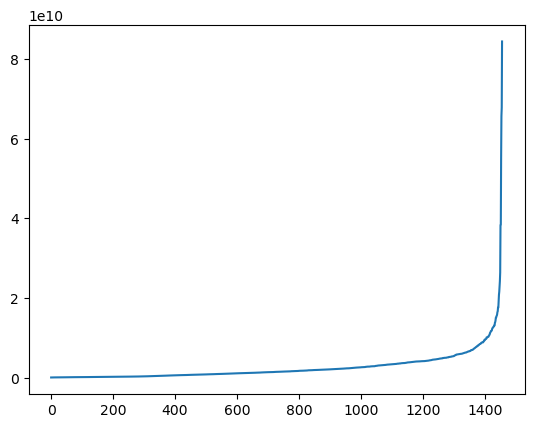

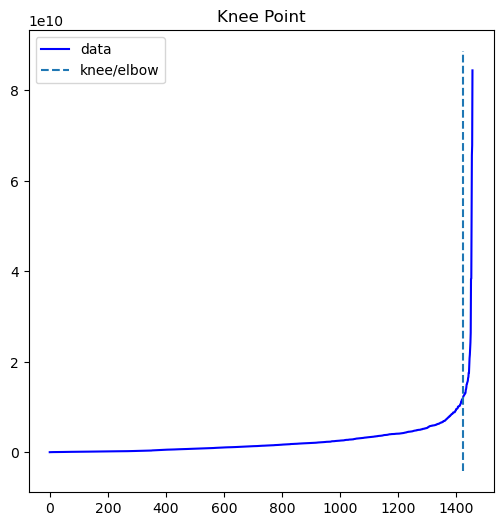

In [316]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
n_neighbor=4
neighbor,neighbor_index=NearestNeighbors(n_neighbors=n_neighbor).fit(data[['market_cap','volume']]).kneighbors()
n=neighbor[:,n_neighbor-1]
print('len:',len(n))
print('max',max(n))
print('min',min(n))
sort_neighbor=np.sort(n)
plt.plot(sort_neighbor)
k_l=KneeLocator(np.arange(len(n)),sort_neighbor,curve='convex')
print('knee',k_l.knee,'\nelbow',k_l.elbow)
k_l.plot_knee()

In [317]:
sort_neighbor[k_l.knee]

11774771520.475836

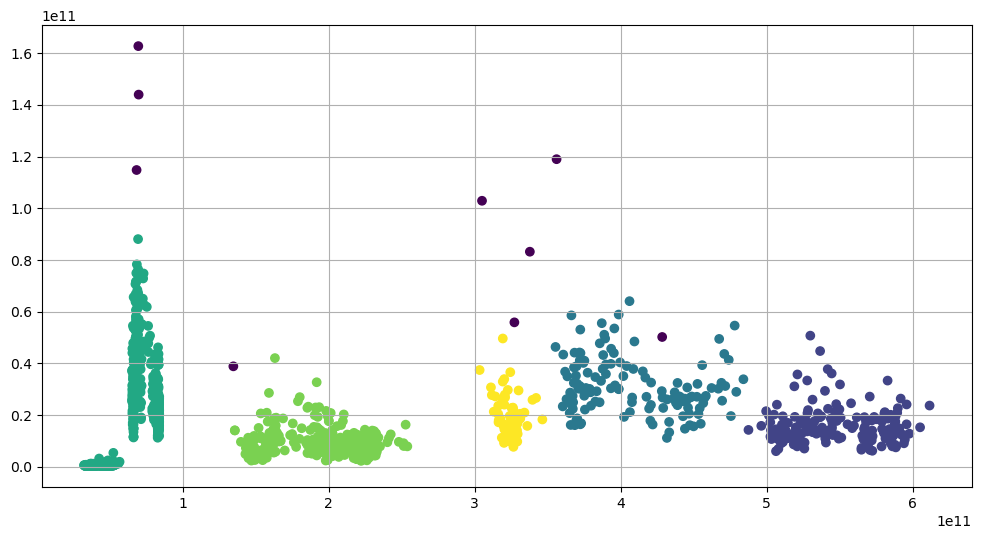

In [318]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=14100000000,min_samples=n_neighbor)#eps=0.2081727,min_samples=8
dbscan.fit(data[['market_cap','volume']])
f,x=plt.subplots(figsize=(12,6))
x.scatter(data['market_cap'],data['volume'],c=dbscan.labels_)
x.grid(True)

In [319]:
np.unique(dbscan.labels_,return_counts=True)

(array([-1,  0,  1,  2,  3,  4], dtype=int64),
 array([  9, 169, 129, 725, 363,  61], dtype=int64))

In [320]:
noise=list(dbscan.labels_).count(-1)
print('noise:',noise)
noise*100/len(dbscan.labels_)

noise: 9


0.6181318681318682

################################################################((((((((((((((((((((((((((((3))))))))))))))))))))))))))))######################################################################

len: 1451
max 52301189923.35933
min 131300217.51793799
knee 1401 
elbow 1401


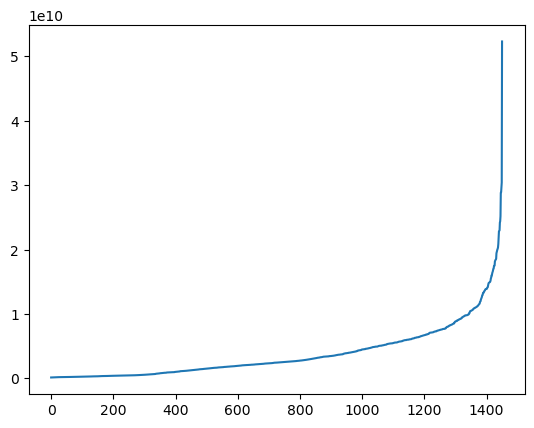

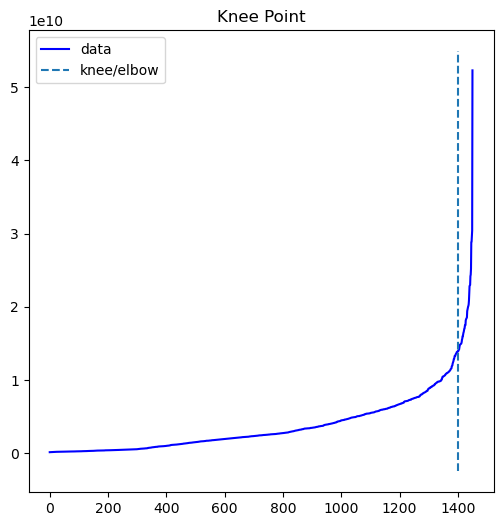

In [321]:
G=data.loc[data['volume']<1*1e11]
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
n_neighbor=10
neighbor,neighbor_index=NearestNeighbors(n_neighbors=n_neighbor).fit(G[['market_cap','volume']]).kneighbors()
n=neighbor[:,n_neighbor-1]
print('len:',len(n))
print('max',max(n))
print('min',min(n))
sort_neighbor=np.sort(n)
plt.plot(sort_neighbor)
k_l=KneeLocator(np.arange(len(n)),sort_neighbor,curve='convex')
print('knee',k_l.knee,'\nelbow',k_l.elbow)
k_l.plot_knee()

In [322]:
sort_neighbor[k_l.knee]

13894417876.96754

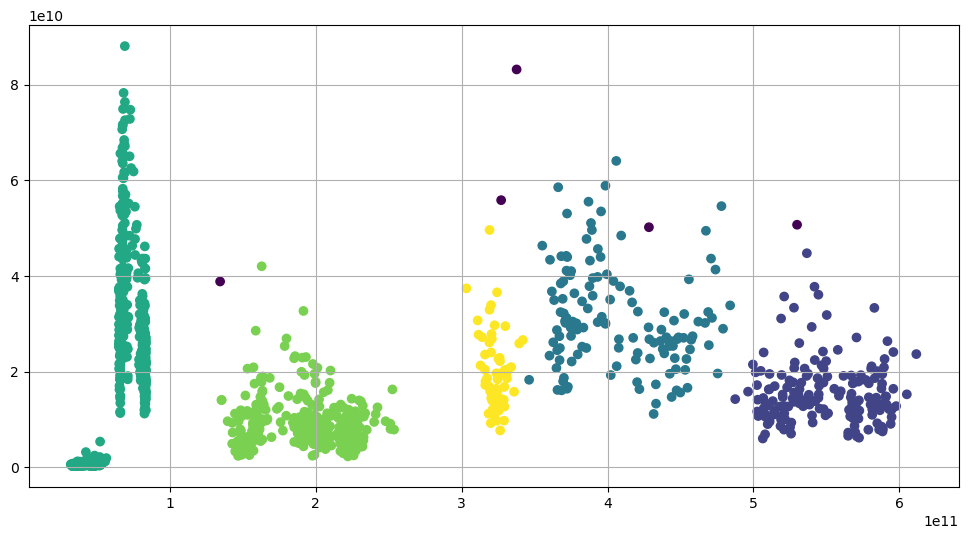

In [323]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=16899999999,min_samples=n_neighbor)#eps=0.2081727,min_samples=8
dbscan.fit(G[['market_cap','volume']])
f,x=plt.subplots(figsize=(12,6))
x.scatter(G['market_cap'],G['volume'],c=dbscan.labels_)
x.grid(True)

In [324]:
np.unique(dbscan.labels_,return_counts=True)

(array([-1,  0,  1,  2,  3,  4], dtype=int64),
 array([  5, 168, 130, 725, 363,  60], dtype=int64))

In [325]:
noise=list(dbscan.labels_).count(-1)
print('noise:',noise)
noise*100/len(dbscan.labels_)

noise: 5


0.34458993797381116